<h1>4. Predicting Loan Approval Using Logistic Regression</h1>
<h3><b>Preprocessing Steps:</b></h3>
<ul>
    <li>Handle missing values (e.g., fill missing values with mode for categorical variables).</li>
    <li>Encode categorical variables (e.g., one-hot encoding for gender, married status, etc.).</li>
    <li>Standardize numerical features.</li>
</ul>
<h3><b>Task:</b> Implement logistic regression to predict loan approval and evaluate the model using accuracy and confusion matrix.</h3>

In [55]:
# Importing Libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix

In [37]:
# Loading the dataset
loan_dataset = pd.read_csv('..\\..\\Datasets\\LoanPrediction.csv')
print(loan_dataset.shape, '\n')
loan_dataset.head()

(598, 13) 



,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0.0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1.0,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0.0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0.0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0.0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


In [38]:
# Printing the basic statistics of the dataset
loan_dataset.describe()

,Dependents,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History
count,586.000000,598.000000,598.000000,577.000000,584.000000,549.000000
mean,0.755973,5292.252508,1631.499866,144.968804,341.917808,0.843352
std,1.007751,5807.265364,2953.315785,82.704182,65.205994,0.363800
min,0.000000,150.000000,0.000000,9.000000,12.000000,0.000000
25%,0.000000,2877.500000,0.000000,100.000000,360.000000,1.000000
50%,0.000000,3806.000000,1211.500000,127.000000,360.000000,1.000000
75%,1.750000,5746.000000,2324.000000,167.000000,360.000000,1.000000
max,3.000000,81000.000000,41667.000000,650.000000,480.000000,1.000000


In [39]:
# Printing the information of the dataset
loan_dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 598 entries, 0 to 597
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            598 non-null    object 
 1   Gender             598 non-null    object 
 2   Married            598 non-null    object 
 3   Dependents         586 non-null    float64
 4   Education          598 non-null    object 
 5   Self_Employed      598 non-null    object 
 6   ApplicantIncome    598 non-null    int64  
 7   CoapplicantIncome  598 non-null    float64
 8   LoanAmount         577 non-null    float64
 9   Loan_Amount_Term   584 non-null    float64
 10  Credit_History     549 non-null    float64
 11  Property_Area      598 non-null    object 
 12  Loan_Status        598 non-null    object 
dtypes: float64(5), int64(1), object(7)
memory usage: 60.9+ KB


<h2>Data Preprocessing</h2>

<h3>1. Handling Missing Values</h3>

In [40]:
# Checking for the missing values in the dataset
loan_dataset.isnull().sum()

Loan_ID               0
Gender                0
Married               0
Dependents           12
Education             0
Self_Employed         0
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           21
Loan_Amount_Term     14
Credit_History       49
Property_Area         0
Loan_Status           0
dtype: int64

In [41]:
# There are four features which have missing values and all the types are of 'float64' datatypes. 
# So imputing the missing values with the median of features.
missing_value_features = loan_dataset[['Dependents', 'LoanAmount', 'Loan_Amount_Term', 'Credit_History']].columns

for features in missing_value_features:
    loan_dataset.fillna({features: loan_dataset[features].median()}, inplace=True)

In [42]:
# Checking for the missing values after imputing in the dataset
print('The missing values in the dataset:',loan_dataset.isnull().sum().sum())

The missing values in the dataset: 0


-> So all the missing values have been imputed by mean of the features.

<h3>2. Encoding Categorical Variables</h3>

In [43]:
# Separating the categorical and numerical variables from the dataset
categorical_features = loan_dataset.select_dtypes('object').columns
categorical_features = categorical_features.drop('Loan_ID')   # Since Loan_ID is the feature which we don't need.
print('Categorical Features:\n', categorical_features, '\n')

numerical_features = loan_dataset.select_dtypes('number').columns
print('Numerical Features:\n', numerical_features)

Categorical Features:
 Index(['Gender', 'Married', 'Education', 'Self_Employed', 'Property_Area',
       'Loan_Status'],
      dtype='object') 

Numerical Features:
 Index(['Dependents', 'ApplicantIncome', 'CoapplicantIncome', 'LoanAmount',
       'Loan_Amount_Term', 'Credit_History'],
      dtype='object')


In [44]:
# Printing categories of each feature
for feature in categorical_features:
    print(feature, ': ', loan_dataset[feature].nunique(), ': ', loan_dataset[feature].unique())
    print(loan_dataset[feature].value_counts(), '\n')

Gender :  2 :  ['Male' 'Female']
Gender
Male      487
Female    111
Name: count, dtype: int64 

Married :  2 :  ['No' 'Yes']
Married
Yes    388
No     210
Name: count, dtype: int64 

Education :  2 :  ['Graduate' 'Not Graduate']
Education
Graduate        465
Not Graduate    133
Name: count, dtype: int64 

Self_Employed :  2 :  ['No' 'Yes']
Self_Employed
No     488
Yes    110
Name: count, dtype: int64 

Property_Area :  3 :  ['Urban' 'Rural' 'Semiurban']
Property_Area
Semiurban    225
Urban        198
Rural        175
Name: count, dtype: int64 

Loan_Status :  2 :  ['Y' 'N']
Loan_Status
Y    411
N    187
Name: count, dtype: int64 



In [45]:
# Applying Label Encoder
encoder = LabelEncoder()

for feature in categorical_features:
    loan_dataset[feature] = encoder.fit_transform(loan_dataset[feature])

In [46]:
# Printing the categories after encoding
for feature in categorical_features:
    print(feature, ': ', loan_dataset[feature].nunique(), ': ', loan_dataset[feature].unique())
    print(loan_dataset[feature].value_counts(), '\n')

Gender :  2 :  [1 0]
Gender
1    487
0    111
Name: count, dtype: int64 

Married :  2 :  [0 1]
Married
1    388
0    210
Name: count, dtype: int64 

Education :  2 :  [0 1]
Education
0    465
1    133
Name: count, dtype: int64 

Self_Employed :  2 :  [0 1]
Self_Employed
0    488
1    110
Name: count, dtype: int64 

Property_Area :  3 :  [2 0 1]
Property_Area
1    225
2    198
0    175
Name: count, dtype: int64 

Loan_Status :  2 :  [1 0]
Loan_Status
1    411
0    187
Name: count, dtype: int64 



-> So, the categorical features in the dataset have been encoded by using Label Encoder.

<h3>3. Standardize Numerical Features</h3>

In [47]:
# Removing the ordinal features from the list of numerical features
numerical_features = numerical_features.drop(['Dependents', 'Credit_History'])
print('Numerical Features:\n', numerical_features)

Numerical Features:
 Index(['ApplicantIncome', 'CoapplicantIncome', 'LoanAmount',
       'Loan_Amount_Term'],
      dtype='object')


In [50]:
# Applying Standardization
scaler = StandardScaler()

for feature in numerical_features:
    loan_dataset[feature] = scaler.fit_transform(loan_dataset[[feature]])

In [53]:
# Printing basic statistics of dataset after standardization
loan_dataset[numerical_features].describe().round(2)

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term
count,598.00,598.00,598.00,598.00
mean,0.00,-0.00,-0.00,0.00
std,1.00,1.00,1.00,1.00
min,-0.89,-0.55,-1.67,-5.13
25%,-0.42,-0.55,-0.55,0.27
50%,-0.26,-0.14,-0.21,0.27
75%,0.08,0.23,0.24,0.27
max,13.05,13.57,6.22,2.14


-> So, each feature have now mean of 0 and standard deviation of 1. Now the data preprocessing steps have been completed.

<h2>Model Training</h2>

In [58]:
# Separating the features and target variable
X = loan_dataset.drop(['Loan_ID', 'Loan_Status'], axis=1)
Y = loan_dataset['Loan_Status']

# Splitting the dataset into train and test data of 80/20 ratio
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=42)

In [59]:
# Applying the model
lr_model = LogisticRegression()
lr_model.fit(X_train, Y_train)

LogisticRegression()

In [60]:
# Predicting the target variable
Y_pred = lr_model.predict(X_test)
Y_pred.shape

(120,)

<h2>Model Evaluation</h2>

<h3>1. Accuracy Score</h3>

In [61]:
# Calculating the accuracy score of the model
accuracy = accuracy_score(Y_test, Y_pred)
print('Accuracy of the model:', accuracy)

Accuracy of the model: 0.8166666666666667


<h3>2. Confusion Matrix</h3>

In [62]:
# Calculating the confusion matrix of the model
conf_matrix = confusion_matrix(Y_test, Y_pred)
print('Confusion Matrix:\n', conf_matrix)

Confusion Matrix:
 [[14 21]
 [ 1 84]]


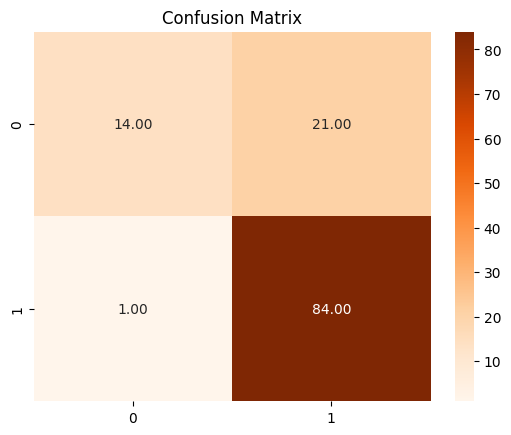

In [65]:
# Visualizing the confusion matrix
sns.heatmap(conf_matrix, cmap='Oranges', fmt='.2f', annot=True)
plt.title('Confusion Matrix')
plt.show()

-> The model's accuracy is 0.817, indicating that it correctly predicts 81.7% of the cases. However, the confusion matrix reveals a significant number of false positives (21), which means the model is incorrectly predicting negative cases as positive. The low number of false negatives (1) suggests that the model is good at identifying positive cases accurately. Despite the high accuracy, the model's high false positive rate may be a concern depending on the application context.<br><br>
-> This is due to the imbalance in the target variable that make the model bias towards predicting one category accurately and the other one inaccurately. This can be handled by using techniques likes SMOTE, ADASYN, Random undersampling and oversampling.

<hr>